In [1]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

from PIL import Image

map_dir = 'map 5'
path = './data/'+map_dir+'/data-of-baselines.json'

In [2]:
#load data from the json file
with open(path) as train_file:
    data = json.load(train_file)

# Survay results:

upload Id workers and search for duplicate workers

In [3]:
raw_df_state_to_action = pd.DataFrame.from_dict(data['humanModel'], orient='index')
raw_df_state_to_action = raw_df_state_to_action.drop(0, axis=1)

participants_df = pd.DataFrame.from_dict(data['all-games'], orient='index')

path = 'data/'+map_dir+'/workers' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    fromOne = pd.read_csv(filename, index_col=None, header=0)
    fromOne['filename'] = filename
    li.append(fromOne)

workers = pd.concat(li, axis=0, ignore_index=True)
workers = workers.set_index('Answer.surveycode')
workers.index = workers.index.map(lambda code: '-' + code[:-3])
# print(workers.index[workers.index.duplicated()])
workers = workers[~workers.index.duplicated(keep='first')]
participants_df['WorkerId'] = workers['WorkerId']
participants_df = participants_df.dropna(subset = ['WorkerId'])
participants_df

,behavior,additional_comments,birth_year,collaborative_value,computer_score,computer_value,education,gender,human_score,predictable_value,selfishly_value,wisely_value,WorkerId
-Ms8apzf274KAnw8anBV,TSP,NICE STUDY.,1981,5,0.300,6,BA,female,1.200,5,5,4,ATZ6BKELCGF6H
-Ms8areDl12-5B5lSAX5,TSP,"I used to play in a league with that blue guy,...",1980,2,0.900,6,BA,male,0.900,6,2,3,A37MQE3V7PAGMB
-Ms8at7zSAJbq6RGJXMI,TSP,,1978,4,0.450,7,Ph.D,male,0.500,3,2,4,A2ZPSPA0R8KSL8
-Ms8av2Z5M2XEIGMqjsx,TSP,,1972,6,0.700,4,BA,female,0.780,7,7,6,A3SJTDFJ03P5LJ
-Ms8avJTdP2GRxWwV6VG,TSP,It was too hard to move your piece,1995,6,0.300,7,BA,female,0.480,4,1,6,A38LW34F26WBJY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Ms8yOdJ_uqmQwTur4dU,TSP,,1980,6,0.800,4,Master's degree,female,0.800,4,5,5,A1IKWVZZ26QTLU
-Ms8ycpJ_XMkhBsmof1z,TSP,,1980,5,0.850,6,Master's degree,female,0.900,6,4,5,A1IKWVZZ26QTLU
-Ms8yqCEZ_bTC4cYxXgi,closest,,1985,5,0.750,5,Master's degree,male,0.850,6,4,6,A1RUBSQBBOJHPO
-Ms8zGLaJT_jVdeJnmUO,farthest,,1985,5,0.950,5,Master's degree,male,1.000,6,4,6,A1RUBSQBBOJHPO


In [4]:
participants_df.columns

Index(['behavior', 'additional_comments', 'birth_year', 'collaborative_value',
       'computer_score', 'computer_value', 'education', 'gender',
       'human_score', 'predictable_value', 'selfishly_value', 'wisely_value',
       'WorkerId'],
      dtype='object')

In [5]:
index_to_drop = participants_df[participants_df.duplicated('WorkerId', keep='first')].index
print(len(index_to_drop))

# participants_df = participants_df[~participants_df.duplicated('WorkerId', keep='first')]

136


number of people that answer the survay only once:

In [6]:
len(participants_df)

205

In [7]:
participants_df.loc[: ,'human_score'] = pd.to_numeric(participants_df['human_score'], errors='coerce')
participants_df.loc[: ,'computer_score'] = pd.to_numeric(participants_df['computer_score'], errors='coerce')
participants_df.loc[: ,'collaborative_value'] = pd.to_numeric(participants_df['collaborative_value'], errors='coerce')
participants_df.loc[: ,'predictable_value'] = pd.to_numeric(participants_df['predictable_value'], errors='coerce')
participants_df.loc[: ,'selfishly_value'] = pd.to_numeric(participants_df['selfishly_value'], errors='coerce')
participants_df.loc[: ,'wisely_value'] = pd.to_numeric(participants_df['wisely_value'], errors='coerce')
participants_df.loc[: ,'computer_value'] = pd.to_numeric(participants_df['computer_value'], errors='coerce')

# View some data

In [8]:
# remove from the dataset :
# raw_df_state_to_action = raw_df_state_to_action.drop(index_to_drop)
raw_df_state_to_action.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, -Ms8apzf274KAnw8anBV to -Ms9Qd8mKX6ASYIMB8xR
Columns: 105 entries, 1 to 105
dtypes: object(105)
memory usage: 173.1+ KB


In [9]:
def extractAction(cell):
    if cell != None:
        return int(cell['action'])
    return np.nan

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def extractState(cell):
    if cell == None:
        return cell
    board = np.array(cell['state'][0]).astype(float)
    human_trace = np.array(cell['state'][1]).astype(float)
    computer_trace = np.array(cell['state'][2]).astype(float)
    human_awards = np.array(cell['state'][3]).astype(float)
    computer_awards = np.array(cell['state'][4]).astype(float)
    all_awards = np.array(cell['state'][5]).astype(float)
    
    r = human_awards/2 + human_trace + all_awards
    g = board/3 + all_awards
    b = computer_awards/2 + computer_trace + all_awards
    rgb = np.dstack((r,g,b))
    return NormalizeData(rgb)
    

state_df = pd.DataFrame(columns=raw_df_state_to_action.columns)
action_df = pd.DataFrame(columns=raw_df_state_to_action.columns)
for col in raw_df_state_to_action:
    state_df[col] = raw_df_state_to_action[col].apply(extractState)
    action_df[col] = raw_df_state_to_action[col].apply(extractAction)

# view one game

In [10]:
def rowToImage(row):
    fig = plt.figure(figsize=(40, 20))
    row_s = state_df.loc[row, :]
    row_a = action_df.loc[row, :]
    cols_i = row_a.count()
    for i in range(1, cols_i+1):
        rows = 1
        columns = cols_i
        state = row_s.at[i]
        fig.add_subplot(rows, columns, i)
        plt.imshow(state)
        plt.axis('off')
        action = row_a.at[i]
        plt.title(str(i) + " action: " + str(action), fontsize=15)

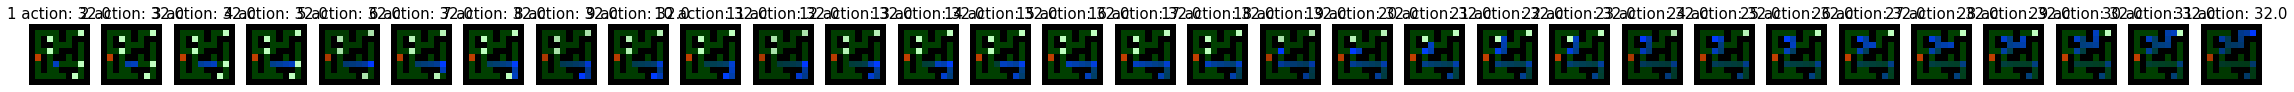

In [14]:
rowToImage('-Ms8apzf274KAnw8anBV')

In [11]:
state_df.head(1)

,1,2,3,4,5,6,7,8,9,10,...,96,97,98,99,100,101,102,103,104,105
-Ms8apzf274KAnw8anBV,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",...,None,None,None,None,None,None,None,None,None,None


In [12]:
state_df.shape

(209, 105)

In [13]:
fcasdfsdf

NameError: name 'fcasdfsdf' is not defined

In [ ]:
action_df[len(action_df.columns) + 1] = np.NaN
action_df.tail()

# Make Dataset

In [ ]:
dir_path = './data/humanModel_v1_dataset'
if os.path.exists(dir_path):
    shutil.rmtree(dir_path)

os.mkdir(dir_path)
# os.mkdir(dir_path+'/action_target')
# os.mkdir(dir_path+'/rate_target')

for action in ['32','37','38','39','40']:
    os.mkdir(dir_path+'/'+action)

import csv
# open the file in the write mode
f = open(dir_path+'/target.csv', 'w')
# create the csv writer
writer = csv.writer(f)

counter = 0
in_p_df = True
for (idxRow, s1), (_, s2) in zip(state_df.iterrows(), action_df.iterrows()):
    for (idxCol, state), (_, action) in zip(s1.iteritems(), s2.iteritems()):
        # check if it is not the last state
        # the last state not enter our model, since it is an end state that not contains any dirts and not preform an action
        if not np.isnan(action_df.loc[idxRow, idxCol+1]):
            im = Image.fromarray((state * 255).astype(np.uint8))
            try:
                in_p_df = True
                value_vector_rate = participants_df.loc[idxRow, ['collaborative_value', 'computer_value', 'predictable_value', 'selfishly_value', 'wisely_value']]
            except KeyError:
                in_p_df = False
                continue
            path = f'data/humanModel_v1_dataset/{int(action)}/{idxRow}_{counter}.png'
            if counter % 500 == 0:
                # print every 500 saved images
                print(f'{idxRow}_{idxCol}.png saved! at action {action}')
            counter += 1
            im.save(path)
            # write a vector to the csv file
            writer.writerow(value_vector_rate)

        else:
            break
        # print (idxCol, idxRow)
print(f'{counter} images have been saved')
# close the file
f.close()

In [ ]:
participants_df.loc['-Ms8yqCEZ_bTC4cYxXgi', 'collaborative_value']

In [ ]:
# rowToImage('-Mr4Yrtg2Rk8u83xa6yl')

In [ ]:
# index = "-MqplpytsnX0zCv_KW9i"
# col = 3
# plt.imshow(state_df.loc[index, col])
# title = "id: " + index + ", col: " + str(col) + ", action: " + str(action_df.loc[index, col])
# plt.title(title)
# plt.show()

In [ ]:
participants_df['collaborative_value']

In [ ]:
participants_df['selfishly_value']